In [110]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.special import factorial
import math
# import csv
from matplotlib import rc, rcParams
c = 299792458

In [98]:
with open('curr_for_diff_voltages.csv', mode ='r') as file:
    lines = file.readlines()
    
wvlns = [float(value.split("±")[0]) for value in lines[0].split(",")[1:] if value.strip()]
## all uncertainties are 2 nm

print(lines)
print(wvlns)

rest = [line.split(",") for line in lines[1:]]
volt_currs = [(float(values[0]), [(float(value.split("±")[0]), float(value.split("±")[1])) for value in values[1:] if value.strip()]) for values in rest]
print(volt_currs)

['voltage (+/- 0.02V),365 ± 2,404.7,435.8,546.1,577,,,\n', '0,0.6425 ± 0.0005,0.1735 ± 0.0005,0.2228 ± 0.0004,0.0008 ± 0.0002,0.0027 ± 0.0005,,,\n', '0.1,0.5454 ± 0.0005,0.1383 ± 0.0005,0.1596 ± 0.0004,-0.0016 ± 0.0003,0 ± 0.0003,,,\n', '0.2,0.4556 ± 0.0005,0.1020 ± 0.0005,0.0966 ± 0.0003,-0.0043 ± 0.0002,-0.0021 ± 0.0002,,,\n', '0.3,0.3625 ± 0.0003,0.0672 ± 0.0002,0.0519 ± 0.0003,-0.00565 ± 0.0003,-0.0042 ± 0.0002,,,\n', '0.4,0.2857 ± 0.0003,0.0431 ± 0.0005,0.00185 ± 0.0005,-0.0074 ± 0.0005,-0.0058 ± 0.0005,,,\n', '0.5,0.2140 ± 0.0005,0.0215 ± 0.0003,-0.0007 ± 0.0002,,,,,\n', '0.6,0.1479 ± 0.0004,0.0055 ± 0.0003,-0.0083 ± 0.0004,,,,,\n', '0.7,0.0978 ± 0.0005,-0.0027 ± 0.0005,-0.0099 ± 0.0004,,,,,\n', '0.8,0.0531 ± 0.0005,-0.0060 ± 0.0004,,,,,,\n', '0.9,0.0222 ± 0.0005,-0.0066 ± 0.0003,,,,,,\n', '1,0.00388 ± 0.0002,,,,,,,\n', '1.1,-0.00421 ± 0.0004,']
[365.0, 404.7, 435.8, 546.1, 577.0]
[(0.0, [(0.6425, 0.0005), (0.1735, 0.0005), (0.2228, 0.0004), (0.0008, 0.0002), (0.0027, 0.0005)]), 

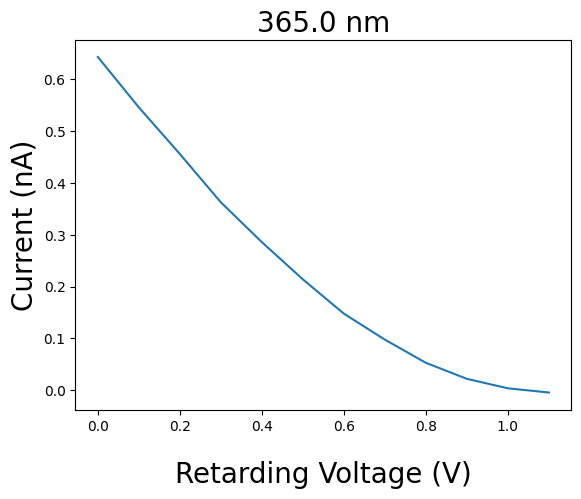

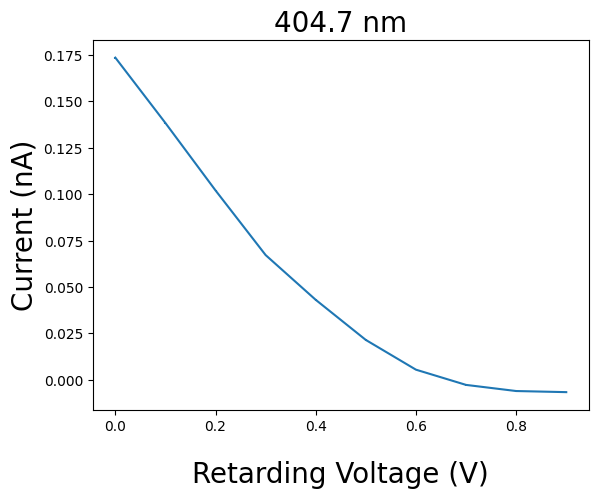

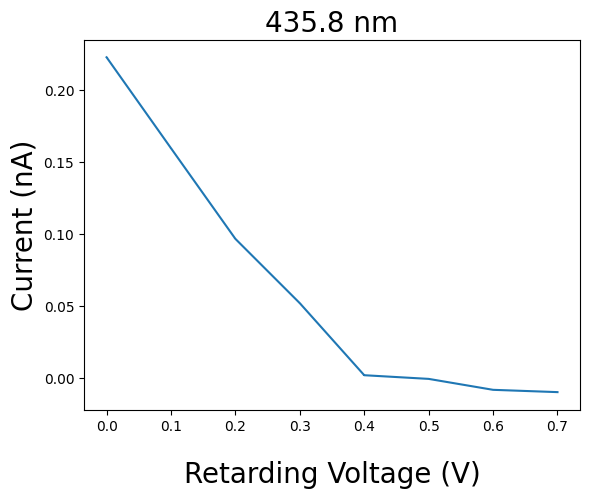

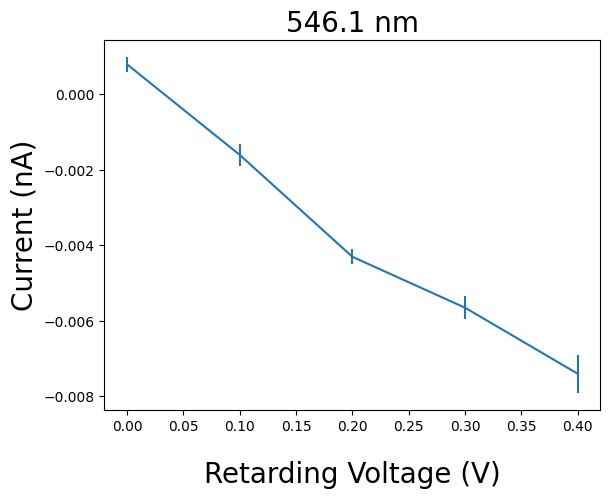

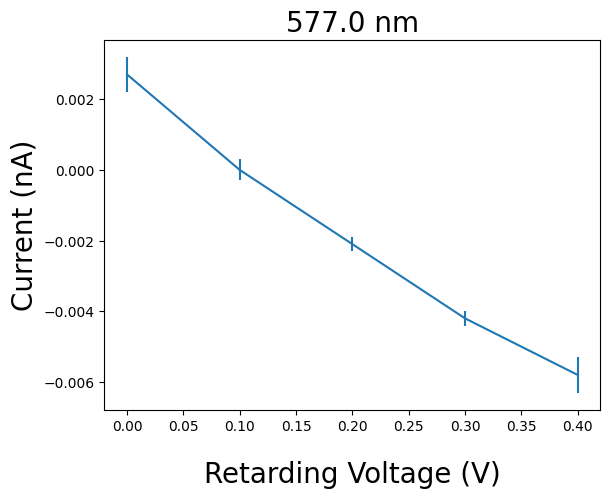

In [99]:
mins = []
minerrs = []
for freq_ind in range(len(wvlns)):
    xs = [volt for volt, currs in volt_currs if len(currs) > freq_ind]
    ys = [currs[freq_ind][0] for volt, currs in volt_currs if len(currs) > freq_ind]
    errs = [currs[freq_ind][1] for volt, currs in volt_currs if len(currs) > freq_ind]
    mine = min(ys)
    mins += [mine]
    minerrs += [errs[ys.index(mine)]]

    # plt.plot(xs, ys)
    plt.errorbar(xs, ys, yerr=errs)

    plt.title(f'{wvlns[freq_ind]} nm', fontsize=20)
    plt.xlabel(r'Retarding Voltage (V)', fontsize=20, labelpad=20)
    plt.ylabel(r'Current (nA)', fontsize=20)
    plt.show()

Text(0, 0.5, 'Least Observed Current (nA)')

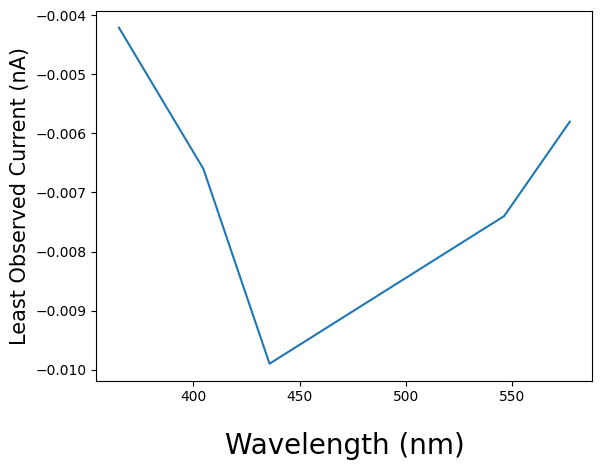

In [100]:
plt.plot(wvlns, mins)
plt.xlabel(r'Wavelength (nm)', fontsize=20, labelpad=20)
plt.ylabel(r'Least Observed Current (nA)', fontsize=15)

In [101]:
import numpy as np

def fitlin(x, y, sig):
    '''
    Performs a least-squares linear fit

    Parameters
    ----------
    x : array
        The independent data
    y : array
        The dependent data
    sig : array
        The uncertainty in y

    Returns
    ----------
    popt : array
        Optimal values for the parameters
    perr : array
        The uncertainty on the fit parameters
    chisq : float
        The value of chi-squared
    yfit : array
        The values of the fitted line at each x
    '''

    ### See Bevington and Robinson Ch. 6 (p. 114)

    # TLDR: by minimizing the chi-squared, you get a system of equations
    ###         term3 = b * term1 + m * term5
    ###         term4 = b * term5 + m * term2
    ###     this equation can be solved by taking determinants
    ###     the inverse of the matrix (the curvature matrix of a linear ftn)
    ###         ( term1 term5 )
    ###         ( term5 term2 )
    ###     is the covariance matrix, and the diagonal terms are the fit errors
    ###     the full formulas can be found on page 114 of Bevington

    term1 = np.sum(    1 / sig**2 )
    term2 = np.sum( x**2 / sig**2 )
    term3 = np.sum(    y / sig**2 )
    term4 = np.sum(  x*y / sig**2 )
    term5 = np.sum(    x / sig**2 )

    delta = term1*term2 - term5**2

    b = ( term2*term3 - term5*term4 ) / delta
    m = ( term1*term4 - term5*term3 ) / delta
    popt = np.array([b, m])

    berr = np.sqrt( term2 / delta )
    merr = np.sqrt( term1 / delta )
    perr = np.array([berr, merr])

    yfit = b + m*x

    chisq = np.sum( ( (y - yfit) / sig )**2 )

    return popt, perr, chisq, yfit

In [102]:
wvlns = np.array(wvlns)
mins = np.array(mins)
minerrs = np.array(minerrs)
popt, perr, chisq, yfit = fitlin(wvlns[:3], mins[:3], minerrs[:3])

Text(0, 0.5, 'Least Observed Current (nA)')

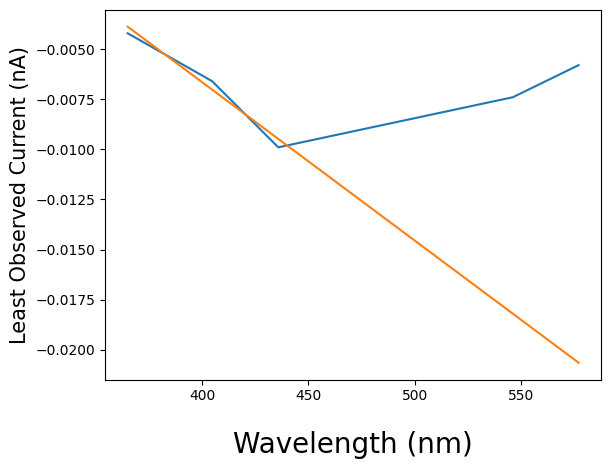

In [103]:
plt.plot(wvlns, mins)
plt.plot(wvlns, wvlns * popt[1] + popt[0])
plt.xlabel(r'Wavelength (nm)', fontsize=20, labelpad=20)
plt.ylabel(r'Least Observed Current (nA)', fontsize=15)


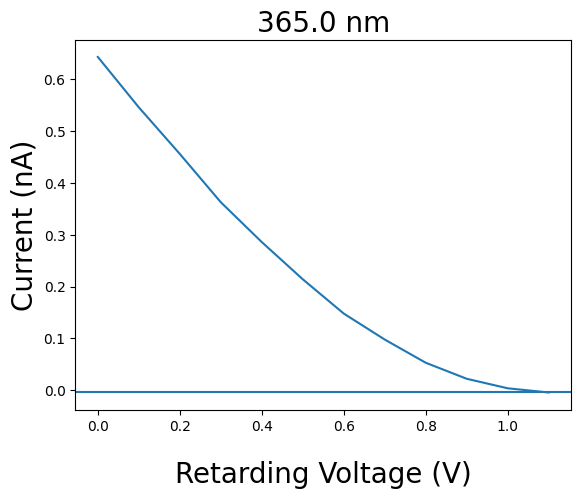

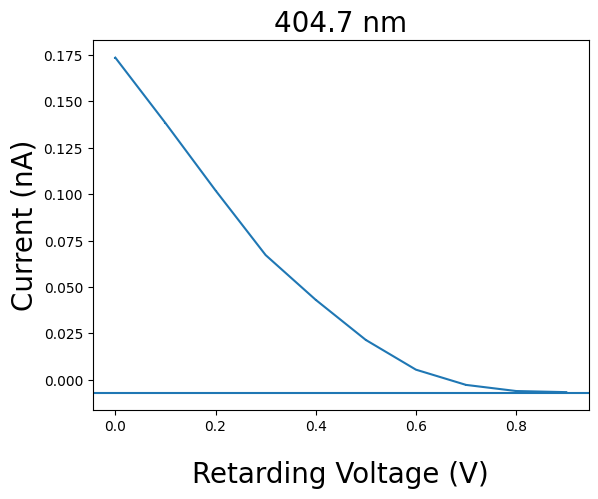

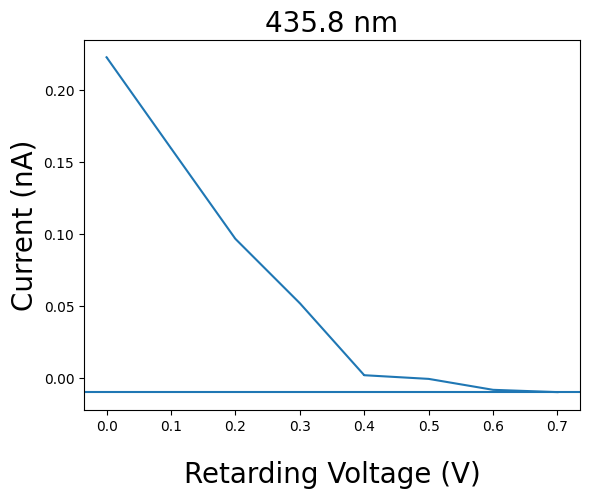

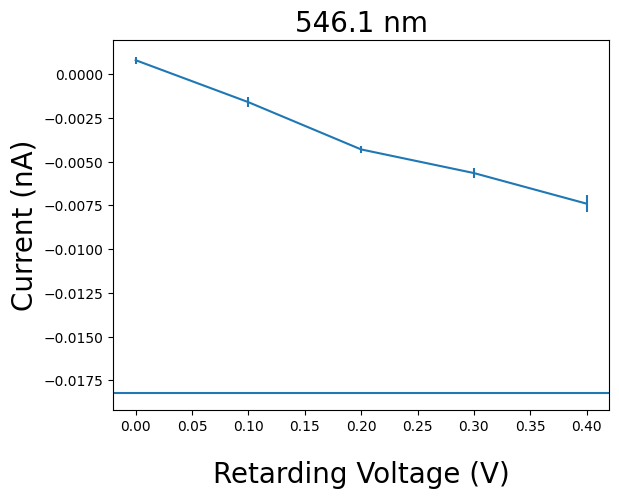

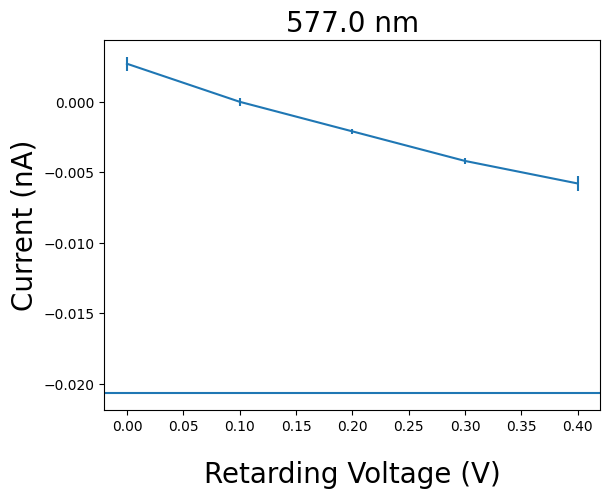

In [104]:
for freq_ind in range(len(wvlns)):
    xs = [volt for volt, currs in volt_currs if len(currs) > freq_ind]
    ys = [currs[freq_ind][0] for volt, currs in volt_currs if len(currs) > freq_ind]
    errs = [currs[freq_ind][1] for volt, currs in volt_currs if len(currs) > freq_ind]

    # plt.plot(xs, ys)
    plt.errorbar(xs, ys, yerr=errs)

    plt.title(f'{wvlns[freq_ind]} nm', fontsize=20)
    plt.xlabel(r'Retarding Voltage (V)', fontsize=20, labelpad=20)
    plt.ylabel(r'Current (nA)', fontsize=20)
    plt.axhline(y=wvlns[freq_ind] * ( popt[1]) + popt[0])
    plt.show()

2
-0.0099


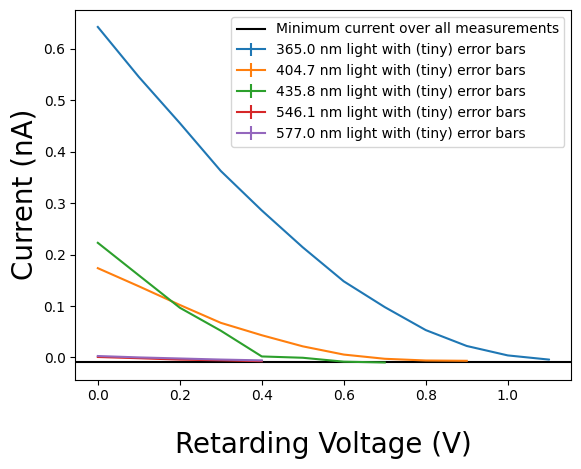

In [211]:
for freq_ind in range(len(wvlns)):
    xs = [volt for volt, currs in volt_currs if len(currs) > freq_ind]
    ys = [currs[freq_ind][0] for volt, currs in volt_currs if len(currs) > freq_ind]
    errs = [currs[freq_ind][1] for volt, currs in volt_currs if len(currs) > freq_ind]

    # plt.plot(xs, ys)
    plt.errorbar(xs, ys, yerr=errs, label=f"{wvlns[freq_ind]} nm light with (tiny) error bars")

    # plt.title(f'All frequencies', fontsize=20)
    plt.xlabel(r'Retarding Voltage (V)', fontsize=20, labelpad=20)
    plt.ylabel(r'Current (nA)', fontsize=20)
    # plt.axhline(y=wvlns[freq_ind] * ( popt[1]) + popt[0])
    # plt.show()

# plt.axhline(y=sum(mins)/len(mins))
plt.axhline(y=min(mins), color=(0,0,0), label="Minimum current over all measurements")

plt.legend(loc="upper right",fontsize=10,ncol = 1)
minmins_freq_index = list(mins).index(min(mins))
print(minmins_freq_index)
print(min(mins))
minminserr = 0.0004 # looked it up: 0.7V on 3rd frequency

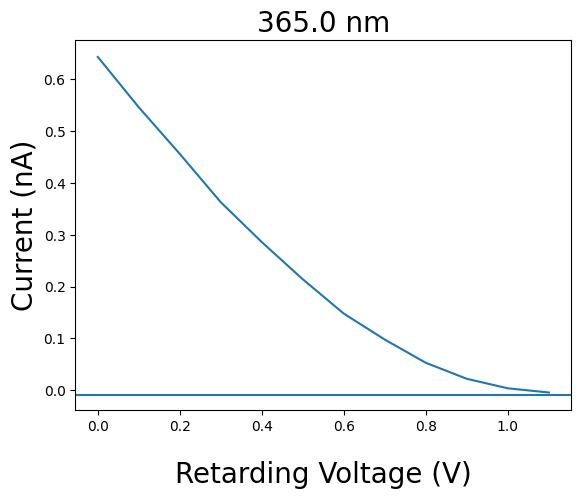

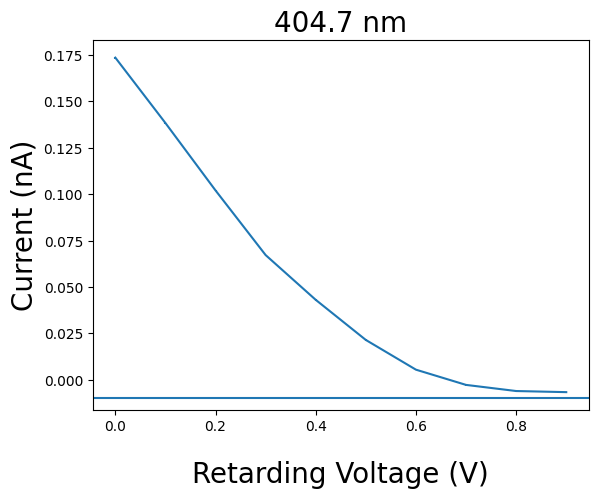

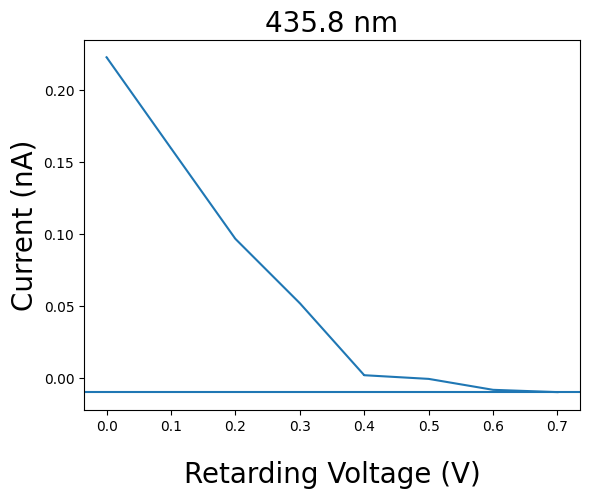

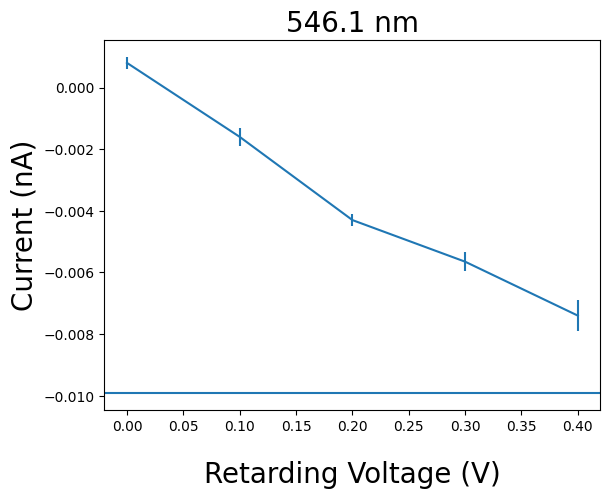

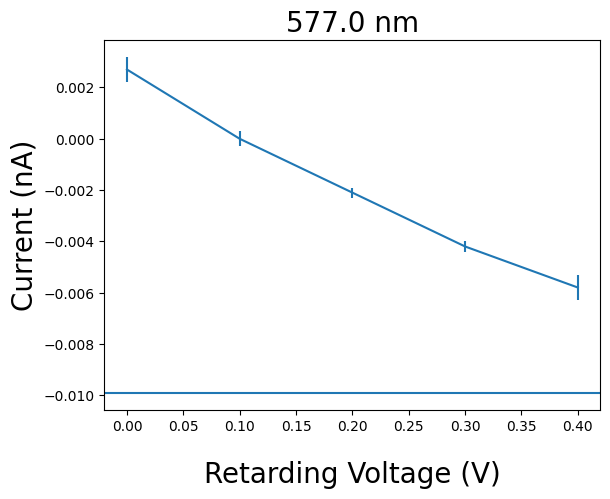

In [106]:
for freq_ind in range(len(wvlns)):
    xs = [volt for volt, currs in volt_currs if len(currs) > freq_ind]
    ys = [currs[freq_ind][0] for volt, currs in volt_currs if len(currs) > freq_ind]
    errs = [currs[freq_ind][1] for volt, currs in volt_currs if len(currs) > freq_ind]

    # plt.plot(xs, ys)
    plt.errorbar(xs, ys, yerr=errs)

    plt.title(f'{wvlns[freq_ind]} nm', fontsize=20)
    plt.xlabel(r'Retarding Voltage (V)', fontsize=20, labelpad=20)
    plt.ylabel(r'Current (nA)', fontsize=20)
    plt.axhline(y=min(mins))
    # plt.axhline(y=sum(mins)/len(mins))
    plt.show()

cutoff voltage 0.6968253968253961


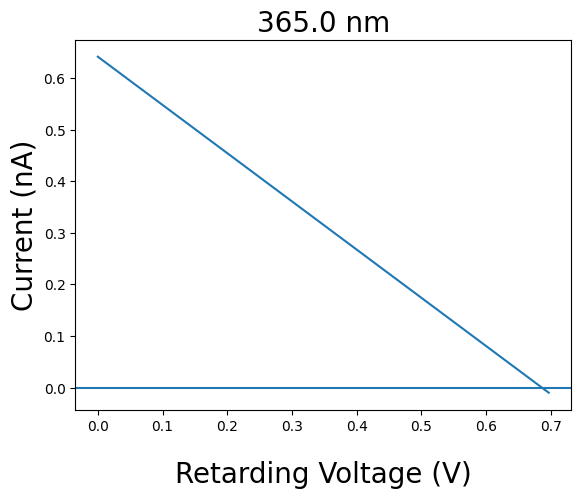

cutoff voltage 0.5135198135198131


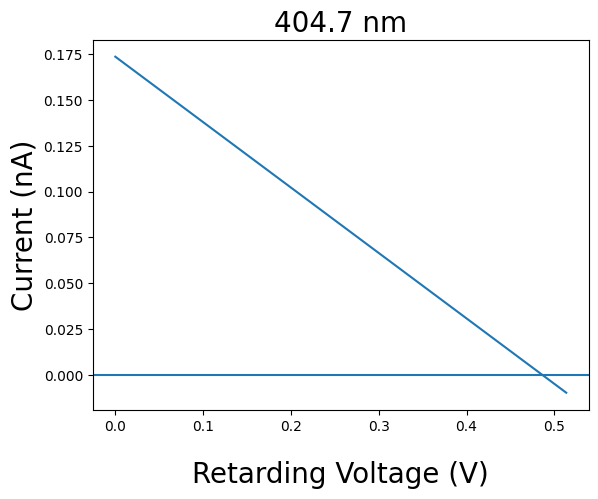

cutoff voltage 0.36876869924490685


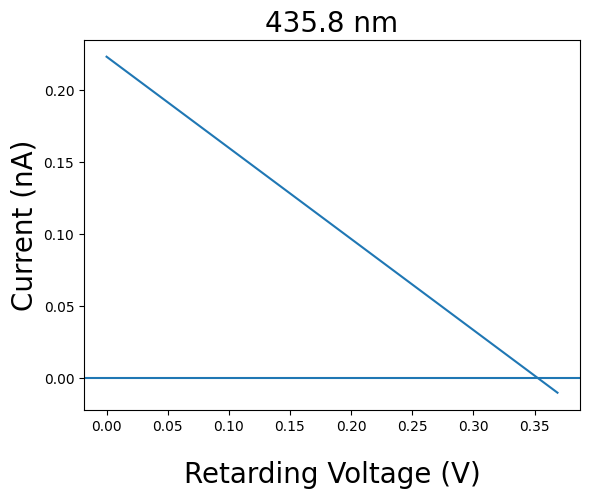

cutoff voltage 0.4771093897479709


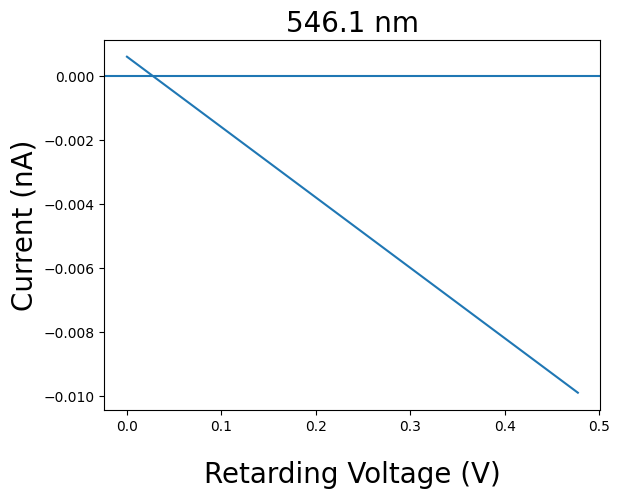

cutoff voltage 0.570162038243109


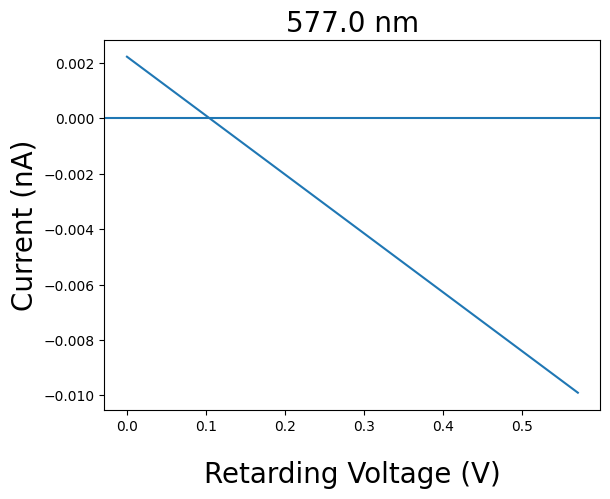

In [225]:
linear_reach_min_of_mins = []
linear_reach_min_of_mins_errs = []
reach_personal_min = []
reach_personal_min_errs = []

for freq_ind in range(len(wvlns)):
    xs = [volt for volt, currs in volt_currs if len(currs) > freq_ind]
    ys = [currs[freq_ind][0] for volt, currs in volt_currs if len(currs) > freq_ind]
    errs = [currs[freq_ind][1] for volt, currs in volt_currs if len(currs) > freq_ind]

    # plt.plot(xs, ys)
    # plt.errorbar(xs, ys, yerr=errs)

    if freq_ind < 3:
        xsf = xs[:3]
        ysf = ys[:3]
        errsf = errs[:3]
    else:
        xsf = xs
        ysf = ys
        errsf = errs

    xsf = np.array(xsf)
    ysf = np.array(ysf)
    errsf = np.array(errsf)
    popt, perr, chisq, yfit = fitlin(xsf, ysf, errsf)
    cutoff = (min(mins) - popt[0]) / popt[1]
    pxs = np.append(xsf, cutoff)
    plt.plot(pxs, pxs * popt[1] + popt[0])
    linear_reach_min_of_mins += [cutoff]
    linear_reach_min_of_mins_errs += [((minminserr + perr[0]) / abs(min(mins) - popt[0]) + perr[1] / abs(popt[1])) * abs(cutoff)]
    print("cutoff voltage", cutoff)

    if freq_ind < 3:
        val = (min(ys) - popt[0]) / popt[1]
        reach_personal_min += [val]
        reach_personal_min_errs += [((errs[ys.index(min(ys))] + perr[0]) / abs(min(ys) - popt[0]) + perr[1] / abs(popt[1])) * abs(val)]
    else:
        reach_personal_min += [xs[-1]]
        reach_personal_min_errs += [0.02]

    plt.title(f'{wvlns[freq_ind]} nm', fontsize=20)
    plt.xlabel(r'Retarding Voltage (V)', fontsize=20, labelpad=20)
    plt.ylabel(r'Current (nA)', fontsize=20)
    # plt.axhline(y=min(mins))
    plt.axhline(y=0)
    # plt.axhline(y=sum(mins)/len(mins))
    plt.show()

In [200]:
class_zeros = [1.07,0.7125,0.53,0.233,0.3166666667]
class_zeros_errs = [0.02] * 5
print(linear_reach_min_of_mins)
print(reach_personal_min)
print(np.array(class_zeros))
print(linear_reach_min_of_mins_errs)
print(reach_personal_min_errs)
planck = []
planck_errs = []
work = []
work_errs = []
ec = 1.60217663e-19

[0.6968254  0.51351981 0.3687687  0.47710939 0.57016204]
[0.69073658 0.50428904 0.3687687  0.4        0.4       ]
[1.07       0.7125     0.53       0.233      0.31666667]
[0.00355279 0.00747413 0.00265323 0.04645925 0.06600739]
[0.00352976 0.00710312 0.00265323 0.02       0.02      ]


slope 2.459902685499187e-15


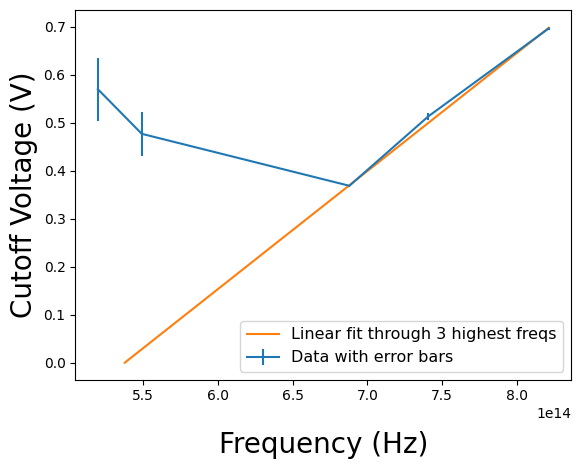

In [201]:
freqs = c / (wvlns * 10**(-9)) # wvlns is in nanometers 
plt.errorbar(freqs, linear_reach_min_of_mins, linear_reach_min_of_mins_errs, label="Data with error bars")
# so clearly, the smallest two freqs must not have the cut
freqs_fitting = np.array(freqs[:3])
linear_reach_min_of_mins_fitting = np.array(linear_reach_min_of_mins[:3])
linear_reach_min_of_mins_errs_fitting = np.array(linear_reach_min_of_mins_errs[:3])
popt, perr, chisq, yfit = fitlin(freqs_fitting, linear_reach_min_of_mins_fitting, linear_reach_min_of_mins_errs_fitting)
# wflin = (0 - popt[0]) / popt[1]
print("slope", popt[1])
planck += [popt[1] * ec]
planck_errs += [perr[1] * ec]
# print("almost work fn", wflin)
# work += [wflin * ec]
# work_errs += [(perr[0]/abs(popt[0]) + perr[1] / abs(popt[1])) * abs(wflin) * ec]
work += [-popt[0]]
work_errs += [perr[0]]
freqs_temp = np.append(freqs_fitting, wflin)
plt.plot(freqs_temp, freqs_temp * popt[1] + popt[0], label="Linear fit through 3 highest freqs")
plt.xlabel(r'Frequency (Hz)', fontsize=20, labelpad=20)
plt.ylabel(r'Cutoff Voltage (V)', fontsize=20)
plt.legend(loc="lower right",fontsize=11.5,ncol = 1)

slope 2.4136404796290096e-15


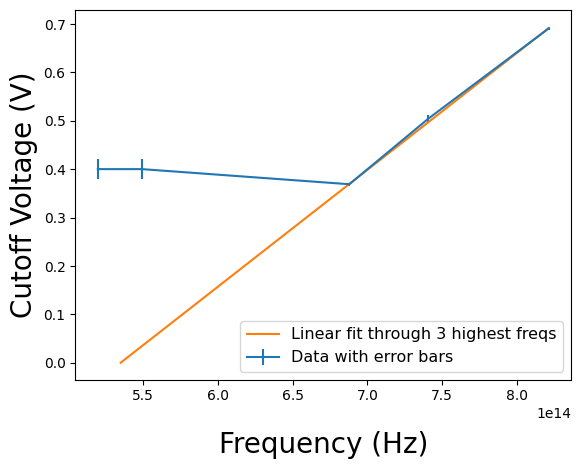

In [202]:
plt.errorbar(freqs, reach_personal_min, reach_personal_min_errs, label="Data with error bars")
reach_personal_min_fitting = np.array(reach_personal_min[:3])
reach_personal_min_errs_fitting = np.array(reach_personal_min_errs[:3])
popt, perr, chisq, yfit = fitlin(freqs_fitting, reach_personal_min_fitting, reach_personal_min_errs_fitting)
# wfrp = (0 - popt[0]) / popt[1]
print("slope", popt[1])
planck += [popt[1] * ec]
planck_errs += [perr[1] * ec]
# print("almost work fn", wfrp)
# work += [wfrp * ec]
# work_errs += [(perr[0]/abs(popt[0]) + perr[1] / abs(popt[1])) * abs(wfrp) * ec]
work += [-popt[0]]
work_errs += [perr[0]]
freqs_temp = np.append(freqs_fitting, wfrp)
plt.plot(freqs_temp, freqs_temp * popt[1] + popt[0], label="Linear fit through 3 highest freqs")
plt.xlabel(r'Frequency (Hz)', fontsize=20, labelpad=20)
plt.ylabel(r'Cutoff Voltage (V)', fontsize=20)
plt.legend(loc="lower right",fontsize=11.5,ncol = 1)

slope 4.079025476871541e-15


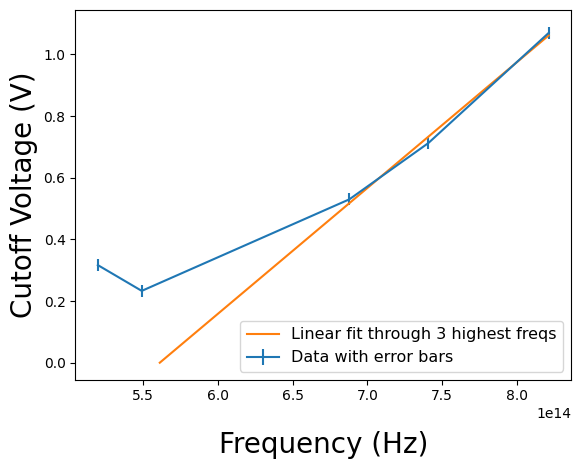

In [203]:
plt.errorbar(freqs, np.array(class_zeros), class_zeros_errs, label="Data with error bars")
class_zeros_fitting = np.array(class_zeros[:3])
class_zeros_errs_fitting = np.array(class_zeros_errs[:3])
popt, perr, chisq, yfit = fitlin(freqs_fitting, class_zeros_fitting, class_zeros_errs_fitting)
# wfcl = (0 - popt[0]) / popt[1]
print("slope", popt[1])
planck += [popt[1] * ec]
planck_errs += [perr[1] * ec]
# print("almost work fn", wfcl)
# work += [wfcl * ec]
# work_errs += [(perr[0]/abs(popt[0]) + perr[1] / abs(popt[1])) * abs(wfcl) * ec]
work += [-popt[0]]
work_errs += [perr[0]]
freqs_temp = np.append(freqs_fitting, wfcl)
plt.plot(freqs_temp, freqs_temp * popt[1] + popt[0], label="Linear fit through 3 highest freqs")
plt.xlabel(r'Frequency (Hz)', fontsize=20, labelpad=20)
plt.ylabel(r'Cutoff Voltage (V)', fontsize=20)
plt.legend(loc="lower right",fontsize=11.5,ncol = 1)

In [204]:
print(planck)
print(planck_errs)
print(work)
print(work_errs)

[np.float64(3.9411985947810374e-34), np.float64(3.86707836968359e-34), np.float64(6.5353192922181884e-34)]
[np.float64(5.322885455537364e-36), np.float64(5.300848733569446e-36), np.float64(3.371962177834399e-35)]
[np.float64(1.322389972337701), np.float64(1.2909899862035532), np.float64(2.288489008594106)]
[np.float64(0.024539617444390413), np.float64(0.02445096358033323), np.float64(0.15827052279697187)]


In [219]:
for i in range(len(planck)):
    print(f"({planck[i] * 1e34:.3f}e-34 ± {planck_errs[i] * 1e34:.3f}e-34) Js")
for i in range(len(planck)):
    print(f"({work[i]:.3f} ± {work_errs[i]:.3f}) J")

(3.941e-34 ± 0.053e-34) Js
(3.867e-34 ± 0.053e-34) Js
(6.535e-34 ± 0.337e-34) Js
(1.322 ± 0.025) J
(1.291 ± 0.024) J
(2.288 ± 0.158) J


In [221]:
work[2] - work[1]

np.float64(0.9974990223905529)

(np.float64(-4.95), np.float64(103.95), np.float64(-2.45), np.float64(51.45))

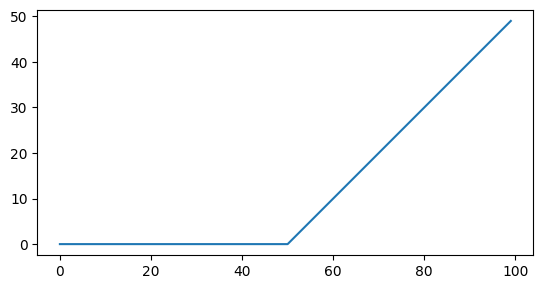

In [223]:
graphicx = np.arange(100)
graphicy = np.concatenate((np.zeros(50), np.arange(50)))
plt.plot(graphicx, graphicy)
plt.axis('scaled')